In [1]:
import pickle
import matplotlib.pyplot as plt
from zero.v3.dataprocess.ObsProcessor import ObsProcessLotus
op=ObsProcessLotus()



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
MODEL:
  action_config:
    best_disc_pos: max
    context_channels: 256
    dim_actions: 7
    dropout: 0.2
    max_steps: 30
    max_traj_len: 1
    max_txt_len: 77
    pos_bin_size: 0.01
    pos_bins: 15
    pos_heatmap_temp: 0.1
    pos_pred_type: heatmap_disc
    reduce: max
    rot_pred_type: euler_disc
    txt_ft_size: 512
    txt_reduce: attn
    use_ee_pose: False
    use_step_id: False
    voxel_size: 0.01
  loss_config:
    pos_weight: 1
    rot_weight: 1
  model_class: SimplePolicyPTV3CA
  ptv3_config:
    add_coords_in_attn: none
    attn_drop: 0.1
    cls_mode: False
    dec_channels: [128, 128, 256, 512]
    dec_depths: [1, 1, 1, 1]
    dec_num_head: [4, 4, 8, 16]
    dec_patch_size: [128, 128, 128, 128]
    drop_path: 0
    enable_flash: False
    enable_rpe: False
    enc_channels: [64, 128, 256, 512, 7

In [4]:

single_episode_path = '/data/zero/data/selfgen/seed42/place_shape_in_shape_sorter/variation0/episodes/episode0/data.pkl'
with open(single_episode_path, 'rb') as f:
    data = pickle.load(f)

print(data.keys())
# divide by frame

all_frames = []
for i in range(len(data['key_frameids'])):
    single_frame = {
        'key_frameids': [],
        'rgb': [],
        'pc': [],
        'action': [],
        'gripper_pose_heatmap': [],
        'bbox': [],
        'pose': [],
    }
    single_frame['key_frameids'] = data['key_frameids'][i]
    single_frame['rgb'] = data['rgb'][i]
    single_frame['pc'] = data['pc'][i]
    single_frame['action'] = data['action'][i]
    single_frame['gripper_pose_heatmap'] = data['gripper_pose_heatmap'][i]
    single_frame['bbox'] = data['bbox'][i]
    single_frame['pose'] = data['pose'][i]
    all_frames.append(single_frame)

first_frame = all_frames[0]

dict_keys(['key_frameids', 'rgb', 'pc', 'action', 'gripper_pose_heatmap', 'bbox', 'pose'])


In [6]:
xyz=first_frame['pc']
rgb=first_frame['rgb']
xyz.shape, rgb.shape








((4, 512, 512, 3), (4, 512, 512, 3))

# Import

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def detect_edges_points(xyz, rgb):
    '''
    Convert RGBD image to edge points
    xyz: (N,H,W,3)
    rgb: (N,H,W,3)
    '''
    batch_size = xyz.shape[0]
    edge_points = []
    for i in range(batch_size):
        image = rgb[i]
        pc = xyz[i]
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        indices = np.where(edges == 255)

        edge_points.append(pc[indices])
        
    edge_points = np.vstack(edge_points)

    print('found edge_points',edge_points.shape)

    return edge_points



test = detect_edges_points(first_frame['pc'], first_frame['rgb'])

found edge_points (27647, 3)


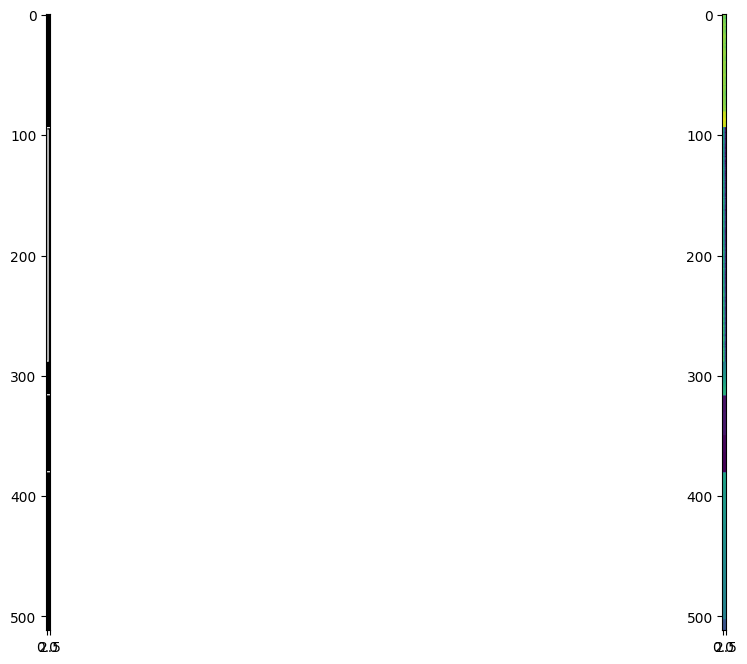

In [37]:
def detect_edges_points(xyz, rgb):
    '''
    Convert RGBD image to edge points
    xyz: (N,H,W,3)
    rgb: (N,H,W,3)
    '''
    batch_size = xyz.shape[0]
    edges_points = []
    for i in range(batch_size):
        image = rgb[i]
        pc = xyz[i]
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        indices = np.where(edges ==255)
        
        edge_points = pc[indices]
        
        print(edge_points.shape)

    return edges


def detect_edges_indices(xyz, rgb):
    '''
    Convert RGBD image to edge indices
    xyz: (N,H,W,3)
    rgb: (N,H,W,3)
    '''
    edges_indices = []

    return edges_indices


test=detect_edges_points(first_frame['pc'], first_frame['rgb'])

(8521, 3)
(6366, 3)
(5781, 3)
(6979, 3)
